In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Read in the data 
mousedata_path = "Data\\Mouse_metadata.csv"
studydata_path = "Data\\Study_results.csv"
micedata = pd.read_csv(mousedata_path)
studydata = pd.read_csv(studydata_path)

## **Data Samples**

#### Mouse_metadata.csv

In [7]:
micedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


#### Study_results.csv

In [8]:
studydata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


### To facilitate analysis, the two tables are merged. Unique information for each Mouse ID  is taken from the micedata table, and added to the to the studydata table.

In [9]:
rawdata = pd.merge(micedata,studydata, on="Mouse ID", how="right").rename(columns={"Timepoint": "Time (days)"})
display(rawdata)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Time (days),Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


## **Data Cleaning**

In [389]:
display(rawdata.describe()) # Verify ability to perform numeric operations on expected columns
display(rawdata.dtypes) # Verify data types are as expected
display(rawdata.count().to_frame()) #Check for blanks

,Age_months,Weight (g),Time (days),Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Time (days)             int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

,0
Mouse ID,1893
Drug Regimen,1893
Sex,1893
Age_months,1893
Weight (g),1893
Time (days),1893
Tumor Volume (mm3),1893
Metastatic Sites,1893


 ### Check for multiple values for each mouseID/timepoint combination
 #### Multiple duplicate entries are observed for mouse ID g989. 

In [11]:
(rawdata.copy()
              .groupby(["Mouse ID","Time (days)"])
              .agg({"Time (days)":"count"}).rename(columns = {"Time (days)":"Duplicates"}) # Column renamed to reflect new data meaining
              .sort_values("Duplicates",ascending = False) # Sorted to make the presence of duplicates readily visible
)

Duplicates
Mouse ID Time (days)            
g989     20                    2
         15                    2
         10                    2
         5                     2
         0                     2
...                          ...
i334     20                    1
         15                    1
         10                    1
         5                     1
z969     45                    1

[1888 rows x 1 columns]

####  We do not know which of these data represents true measurments. To ensure the accuracy of the study, All MouseID/timepoints combinations that are not unique will be deleted.

In [12]:
cleandata = rawdata.copy().drop_duplicates(subset=["Mouse ID","Time (days)"],keep=False)
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Time (days),Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


## **Data Analysis**

#### High level overview of tumor volume data

In [15]:
drugstats = (cleandata.copy().groupby("Drug Regimen") # Group the data by drug regimen
             .agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']}) # Return statistics on tumor volume
            )
drugstats.style.format("{:.2f}") # Improve the format of the output

### Survival rates of each cohort over the course of the study

In [19]:
drugmicecounts = (cleandata.copy().groupby(["Drug Regimen","Time (days)"]) # Group the data by timepoints for each drug regimen
                  .agg({"Mouse ID":'count'})# Return the number of mice alive at each timepoint
                  .unstack().T.droplevel(0,0) # Improve the format of the output
                 )
drugmicecounts

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Time (days),,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


## **Data Visualization**

### **Survival Rates for All Drug Treatment Cohorts**
#### Plotting survival rates using matplotlib

Text(0.5, 0, 'Time (days)')

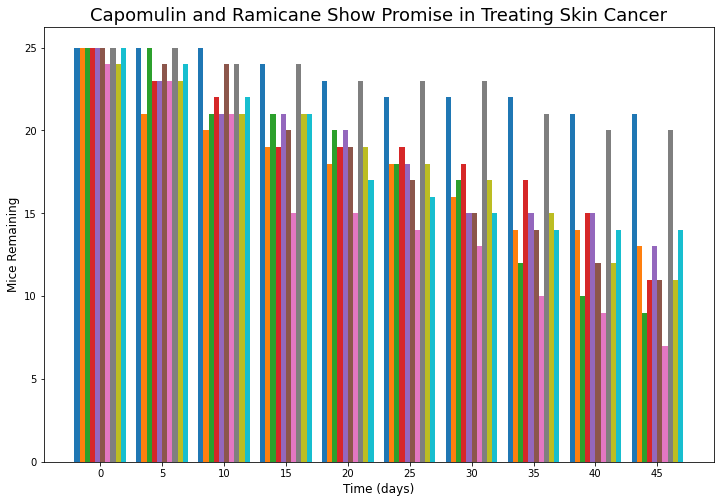

In [45]:
# Generation of a list to use for x-axis ticks
x2 = np.arange(len(drugmicecounts))*12+4

# Declare variable to use for column width
width = 1

# Generate a figure with a flexible number data inputs
fig1, ax = plt.subplots(figsize = (12,8))

# Select and plot each column of data, specifying the location to plot on the x-axis
plt.xticks(ticks =x2+4.5, labels = drugmicecounts.index,fontsize =10)
capomulinbar = ax.bar(x2, drugmicecounts["Capomulin"],width)
ceftaminbar = ax.bar(x2+1,drugmicecounts['Ceftamin'],width)
infubinolbar = ax.bar(x2+2,drugmicecounts['Infubinol'],width)
ketaprilbar = ax.bar(x2+3,drugmicecounts['Ketapril'],width)
naftisolbar = ax.bar(x2+4,drugmicecounts['Naftisol'],width)
placebobar = ax.bar(x2+5,drugmicecounts['Placebo'],width)
proprivabar = ax.bar(x2+6,drugmicecounts['Propriva'],width)
ramicanebar = ax.bar(x2+7,drugmicecounts['Ramicane'],width)
stelasynbar = ax.bar(x2+8,drugmicecounts['Stelasyn'],width)
zoniferol= ax.bar(x2+9,drugmicecounts['Zoniferol'],width)

# improve formating
plt.title("Capomulin and Ramicane Show Promise in Treating Skin Cancer",fontsize=18)
plt.ylabel("Mice Remaining", fontsize =12)
plt.xlabel("Time (days)", fontsize =12)

### Creating the same plot using pandas

Text(0.5, 0, 'Time (days)')

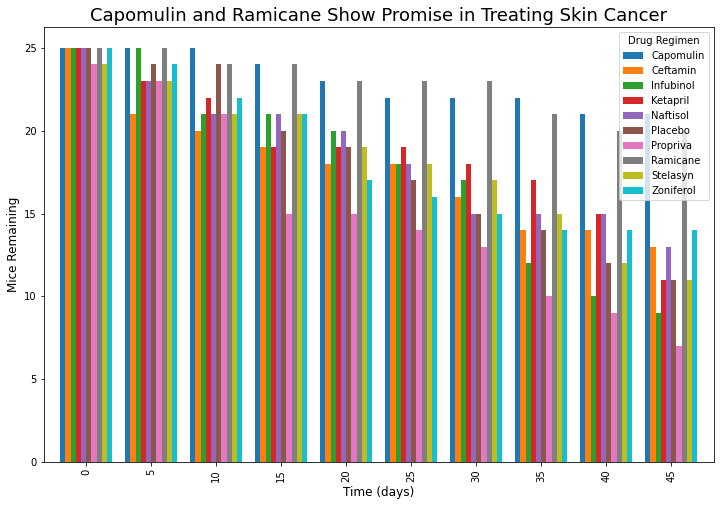

In [29]:
# Plot the entire dataframe as a bar chart
drugmicecounts.plot.bar(figsize = (12,8),width = 0.8)

# Improve formating
plt.title("Capomulin and Ramicane Show Promise in Treating Skin Cancer",fontsize=18)
plt.ylabel("Mice Remaining", fontsize =12)
plt.xlabel("Time (days)", fontsize =12)

### Alternate bar chart format that is much easier to follow
#### (pandas)

Text(0, 0.5, 'Time (days)')

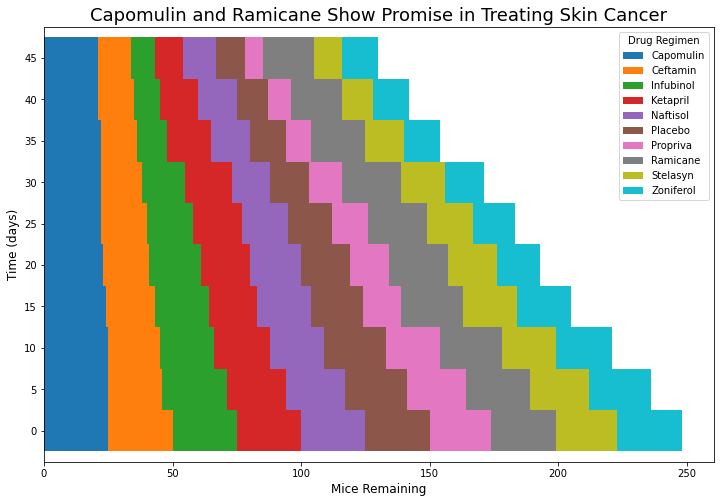

In [28]:
drugmicecounts.plot.barh(stacked = True,width =1,figsize = (12, 8))

plt.title("Capomulin and Ramicane Show Promise in Treating Skin Cancer",fontsize=18)
plt.xlabel("Mice Remaining", fontsize =12)
plt.ylabel("Time (days)", fontsize =12)

### **Gender Demographics for Study Participants**

In [39]:
gendermice= micedata["Sex"].copy().value_counts()
gendermice

Male      125
Female    124
Name: Sex, dtype: int64

#### Pie chart generated using matplotlit 

([<matplotlib.patches.Wedge at 0x2d69167fd30>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

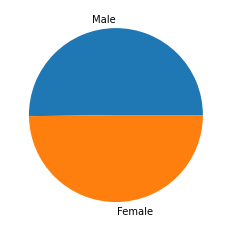

In [40]:
plt.pie(gendermice,labels =["Male","Female"])

#### Creating the same chart with pandas

<AxesSubplot:ylabel='Gender Demographic Across All Drug Regimens'>

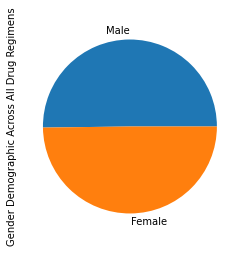

In [46]:
gendermice.plot(kind = "pie",ylabel="Gender Demographic Across All Drug Regimens")

## **Final Tumor Volume Comparison for the Top Four Drug Treatments**

#### Determination of the spread for each cohort

In [47]:
mouselast = rawdata.copy().groupby(["Drug Regimen","Mouse ID"]).agg({"Time (days)":"last"})

def q1(x):
    return x.quantile(.25)
def q3(x):
    return x.quantile(.75)
    
finalvolume = pd.merge(mouselast,rawdata,on = ["Mouse ID","Time (days)"], how = "left")
drugquartiles = finalvolume.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":[q1,q3]}).droplevel(0,1)
             

drugquartiles["IQR"] = drugquartiles["q3"] - drugquartiles["q1"]


topdrugs = drugquartiles.T[["Capomulin", "Ramicane","Infubinol","Ceftamin"]].T
topdrugs

,q1,q3,IQR
Drug Regimen,,,
Capomulin,32.377357,40.159220,7.781863
Ramicane,31.560470,40.659006,9.098537
Infubinol,54.048608,65.525743,11.477135
Ceftamin,48.722078,64.299830,15.577752


#### Check for, and report, any outliers for each cohort

In [48]:
volumeoutliers = pd.merge(finalvolume, topdrugs,on = "Drug Regimen")
volumeoutliers['Lower Bound'] = volumeoutliers["q1"] - 1.5 * volumeoutliers["IQR"]
volumeoutliers['Upper Bound'] = volumeoutliers["q3"] + 1.5 * volumeoutliers["IQR"]
for rows in range(len(volumeoutliers)):
    a = volumeoutliers.iloc[rows,6] < volumeoutliers.iloc[rows,11]
    b = volumeoutliers.iloc[rows,6] > volumeoutliers.iloc[rows,12] 
    if a == True or b == True:
        print(f'{volumeoutliers.iloc[rows,6]} is an outlier for the drug {volumeoutliers.iloc[rows,2]}')

36.3213458 is an outlier for the drug Infubinol


### **Data Visualization**
#### Prepare data for plotting

In [59]:
boxdata = (finalvolume.groupby(["Drug Regimen","Mouse ID"]) # Group mice by drug regimen
           .agg({"Tumor Volume (mm3)":'first'}) # Return final tumor volume for each mouse ID
           .unstack().T.reset_index()) # Sort data into columns for plotting

# Separate data into variables for each drug regimen
capomulin_tumors = boxdata["Capomulin"].dropna().to_frame().reset_index(drop = True)
ramicane_tumors = boxdata["Ramicane"].dropna().to_frame().reset_index(drop = True)
infubinol_tumors = boxdata["Infubinol"].dropna().to_frame().reset_index(drop = True)
ceftamin_tumors = boxdata["Ceftamin"].dropna().to_frame().reset_index(drop = True)
placebo_tumors = boxdata["Placebo"].dropna().to_frame().reset_index(drop = True)

#### Generate box and whisker plots using matplotlib

Text(0.5, 1.0, 'Placebo')

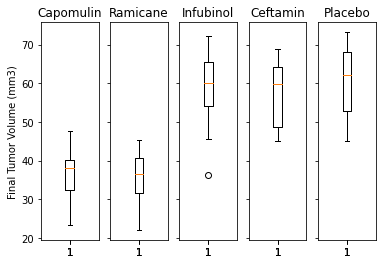

In [49]:
# generate a figure that will receive data for five separate axis
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, sharey = True,sharex = True)

# Specify a title, and plot each of the selected drug regimens
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capomulin_tumors, manage_ticks=False)
ax1.set_title("Capomulin")

ax2.boxplot(ramicane_tumors)
ax2.set_title("Ramicane")

ax3.boxplot(infubinol_tumors)
ax3.set_title("Infubinol")

ax4.boxplot(ceftamin_tumors)
ax4.set_title("Ceftamin")

ax5.boxplot(placebo_tumors)
ax5.set_title("Placebo")

## **Sample Tumor Response to the Capomulin Drug Treatment**

<AxesSubplot:title={'center':'Case Study: b128, Capomulin Treatment Regimen'}, xlabel='Time (days)', ylabel='Tumor Volume (mm3)'>

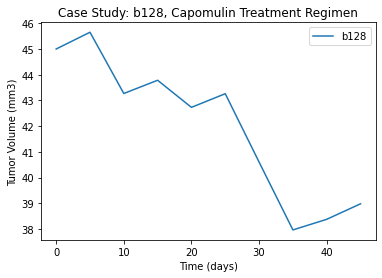

In [50]:
mousetimedata = rawdata.copy().groupby(["Drug Regimen","Mouse ID", "Time (days)"]).agg({"Tumor Volume (mm3)":"first"}).unstack()
capomulinmice = mousetimedata.T["Capomulin"]
singlemouse = capomulinmice.copy().iloc[:,0].to_frame().droplevel(0,0)
singlemouse.plot(kind ="line",title = "Case Study: b128, Capomulin Treatment Regimen",ylabel = "Tumor Volume (mm3)")

In [54]:
capomulintumors = (rawdata.copy().groupby(["Drug Regimen","Mouse ID"]) # group data by drug regimen and mouse id
                   .agg({"Tumor Volume (mm3)":"mean","Weight (g)":'first'}) # return mouse weight and average tumor volume
                   .T["Capomulin"].T # Select data from the capomulin drug regimen only
                  .rename(columns = {"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})) # label column to represent new meaning

There is a strong correlation of 0.84 between these values
Y = 0.74x + -10.15


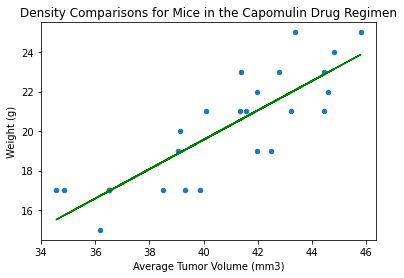

In [54]:
xaxis = capomulintumors["Average Tumor Volume (mm3)"]
yaxis = capomulintumors["Weight (g)"]
(m,b,rvalue,pvalue,stderr) = st.linregress(xaxis,yaxis)
linearfit = m * xaxis + b
#plt.annotate(linearfit,xy=(0,0),color="red")
capomulintumors.plot.scatter('Average Tumor Volume (mm3)',"Weight (g)",
                             title = "Density Comparisons for Mice in the Capomulin Drug Regimen").plot(xaxis,linearfit,"green")

densitycorrelation = st.pearsonr(capomulintumors['Average Tumor Volume (mm3)'],
                                 capomulintumors["Weight (g)"])
print(f'There is a strong correlation of {round(densitycorrelation[0],2)} between these values')
print(f'Y = {round(m,2)}x + {round(b,2)}')